# <span style="color:green">  Numerical exercises 3</span>

## <span style="color:red"> Exercise 3.1</span>

#### <span style="color:black"> Objective </span>

The topic of this simulation is the application at the financial market of a Monte Carlo simulation. In particular I've focused mine attenction to the european call and put option. I made a simulation with two different methods for both option:

-  Sampling directly the final asset price $S(T)$
-  By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 


#### <span style="color:black"> Algorithm for "direct" sampling </span>

The direct sampling is the easiest to-implement algorithm. It is enought to evaluate the following formula at the delivery time of the option $T$:

 $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$

where $W(t)\sim\mathcal{N}(0,t)$ so $w(T)$ will be random generated with normal distribution.

#### <span style="color:black"> Algorithm for discrete sampling </span>

Making the discrete sampling is only slightly more complex. Therefore in order to evaluate $S(T)$ with descrete step dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$
and using each step the following formula:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
Where is $Z_i\sim \mathcal{N}(0,1)$ so $z_i$ will be random generated with normal distribution.

will got the value of interest. 

#### <span style="color:black"> Evaluation of put-call prices </span>

With the value of $S(T)$, discrete or direct, is possible to calculate the call price as $\max(0,S(T)-k)e^{-rT}$ or the put price as $\max(0,k-S(T))exp^{-rT}$. Where $k$ is the strike price, $r$ the risk-free interest rate.

#### <span style="color:black"> C$++$ implementation </span>

I built a c++ class where I added the methods needed for the evaluation of prices.
The structure of the class is the following:
- The class recives in input the parameter that are presented in the next section plus the number of step for discrete sampling that were fixed at $100$.
- Two methods $MakeDiscretePrice$ which implements the discrete sampling algorithm previous described and $MakePrice$ that implements the algorithm for direct sampling
- four methods that return the put or call prices evaluated with use of previous two methods and as described in the previous section 


#### <span style="color:black"> Making of simulation and statistic </span>

As parameter It was given:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

I made $M=10^5$ evaluation for both the two option and two method per option. The average and uncertainty are evaluated by data blocking with $N=100$ blocks. 

#### <span style="color:black"> Results </span>

The result are showed below, where every methods and options are compared with the exact result obtained from Black-Scholes analytic solution. They exhibit a good compatibility and convergence.

In order:

- the first one is discrete call-option
- the second direct call-option 
- the third discrete put-option
- the last direct put option

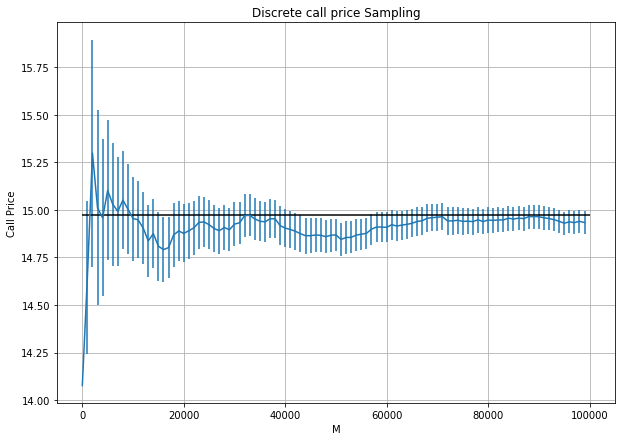

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(100)
x*=1000
ave, err =np.loadtxt("DiscCall.dat", unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave,yerr=err)
plt.hlines(14.975790778311286,0,100000)
plt.xlabel("M")
plt.ylabel("Call Price")
plt.title("Discrete call price Sampling")
plt.grid(True)
plt.show()

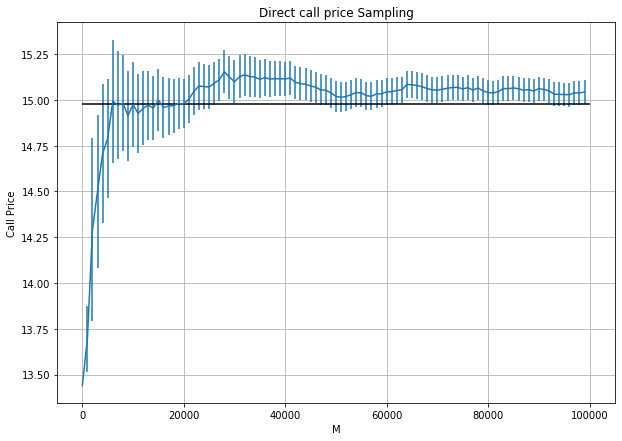

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(100)
x*=1000
ave, err =np.loadtxt("Call.dat", unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave,yerr=err)
plt.hlines(14.975790778311286,0,100000)
plt.xlabel("M")
plt.ylabel("Call Price")
plt.title("Direct call price Sampling")
plt.grid(True)
plt.show()

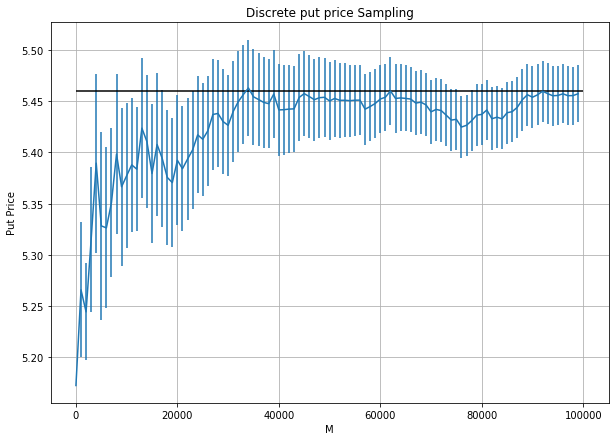

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(100)
x*=1000
ave, err =np.loadtxt("DiscPut.dat", unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave,yerr=err)
plt.hlines(5.4595325819072364,0,100000)
plt.xlabel("M")
plt.ylabel("Put Price")
plt.title("Discrete put price Sampling")
plt.grid(True)
plt.show()

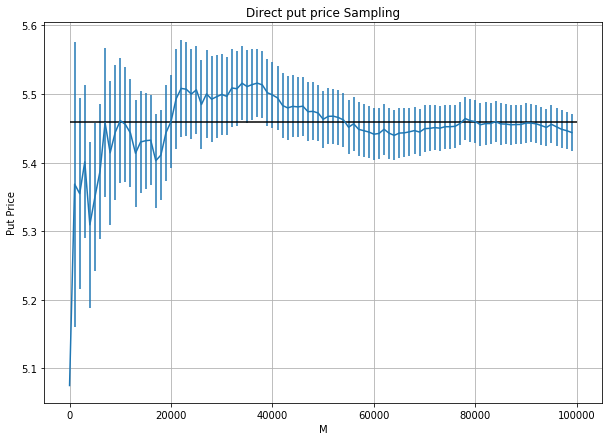

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(100)
x*=1000
ave, err =np.loadtxt("Put.dat", unpack=True)

fig=plt.figure(figsize=(10, 7))
plt.errorbar(x,ave,yerr=err)
plt.hlines(5.4595325819072364,0,100000)
plt.xlabel("M")
plt.ylabel("Put Price")
plt.title("Direct put price Sampling")
plt.grid(True)
plt.show()